# SIC TO FF49 csv file

In [1]:
# import pandas as pd
 
# # laod the Fama-French 49 industry classification txt
# with open('Siccodes49.txt') as f:
#     content = f.readlines()
# # remove whitespace characters like `\n` at the end of each line
# ff49 = [x.strip() for x in content] 
 
# classification = []
# sic1 = []
# sic2 = []
# for l in ff49:
#     # if list in empty - skip
#     if not l:
#         continue
#     # if not empty, break line by space
#     l = l.split()
#     if 1<= len(l[0]) <= 2:
#         class_ = l[0]  # assign the ff49 industry classification
#         continue
#     if '-' in l[0]:
#         classification.append(class_)  # append lass classfication
#         sic1.append(l[0][:4])
#         sic2.append(l[0][5:])
 
# df = pd.DataFrame(data={'ff49': classification,
#                         'sic1': sic1,
#                         'sic2': sic2})
 
# # export the dataframe to csv
# df.to_csv('Siccodes49.csv', index=0)

In [126]:
data_tnic = pd.read_table('tnic3_allyears_extend_scores.txt')
data_from_2012 = data_tnic[data_tnic['year'].isin([2012,2013,2014,2015])]
data_from_2012.head()

,year,gvkey1,gvkey2,score
12309910,2012,1004,1210,0.0321
12309911,2012,1004,1823,0.0481
12309912,2012,1004,2285,0.0006
12309913,2012,1004,2811,0.0044
12309914,2012,1004,3580,0.0184


In [129]:
data_from_2012.describe()

c:\program files\anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,year,gvkey1,gvkey2,score
count,2.063160e+06,2.063160e+06,2.063160e+06,2.046440e+06
mean,2.013653e+03,8.442794e+04,8.442794e+04,7.282915e-02
std,1.086870e+00,7.147683e+04,7.147683e+04,6.305071e-02
min,2.012000e+03,1.004000e+03,1.004000e+03,0.000000e+00
25%,2.013000e+03,1.862500e+04,1.862500e+04,NaN
50%,2.014000e+03,6.291900e+04,6.291900e+04,NaN
75%,2.015000e+03,1.622190e+05,1.622190e+05,NaN
max,2.015000e+03,3.172640e+05,3.172640e+05,9.042000e-01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017FDA2904E0>]],
      dtype=object)

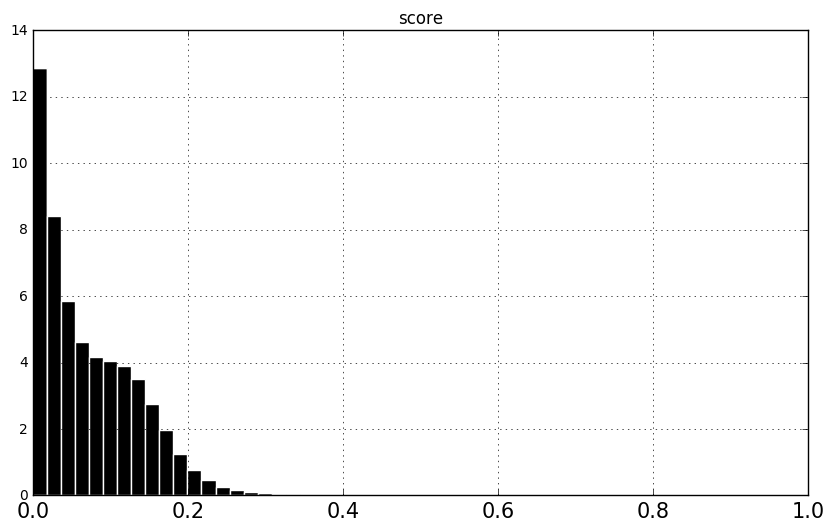

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline
data_from_2012.hist(column='score', bins=50, figsize=(10,6),xlabelsize=15, facecolor='k', edgecolor='w', normed=True)

In [ ]:
data_from_2012.plot.hist

In [67]:
data_tnic = pd.read_table('tnic3_allyears_extend_scores.txt')
data_from_2012 = data_tnic[data_tnic['year'] >= 2012]
data_from_2012.head()

tnic_merged = pd.merge(data_from_2012, data_reduced, how='inner', left_on=['year','gvkey2'], right_on=['fyear', 'gvkey'])

index_file = pd.read_csv('sicmerged.csv')
print(index_file.shape)

data_merged = pd.merge(tnic_merged, index_file, how='left', left_on=['gvkey','cik','fyear'], right_on=['gvkey','cik','fyear'])
data_merged = data_merged.drop_duplicates(subset=['gvkey','cik','fyear'])
data_merged = data_merged[data_merged['ex'] != 'OTC']

print(data_merged.shape)

data_dropped = data_merged
del data_merged, index_file, tnic_merged

data_dropped = data_dropped[~pd.isnull(data_dropped['oibdp'])]
data_dropped = data_dropped[~pd.isnull(data_dropped['sale'])]
data_dropped = data_dropped[~pd.isnull(data_dropped['at'])]
data_dropped['OI/sales'] = data_dropped['oiadp']/data_dropped['sale']
data_dropped['OI/asset'] = data_dropped['oiadp']/data_dropped['at']
data_dropped['sic_2digit'] = data_dropped['sich'].astype('str').str[:2]

data_dropped = data_dropped[~data_dropped['OI/asset'].isin([np.inf,-np.inf, np.NaN, -np.NaN])]
data_dropped = data_dropped[~data_dropped['OI/sales'].isin([np.inf,-np.inf, np.NaN, -np.NaN])]

num_firm_in_clusters = int(data_dropped.shape[0] * 0.0033)
print(num_firm_in_clusters)

std_OIasset_each = []
std_OIsales_each = []
std_marketB_each = []

for i, data in data_dropped.groupby(by='year'):
    if i%1000 == 0 :
        print(i, end=' ')
    sorted_data = data.sort_values(by='score',ascending=False).reset_index()
    selected_data = sorted_data[:num_firm_in_clusters]       
    std_OIasset_each.append(selected_data['OI/asset'].std())
    std_OIsales_each.append(selected_data['OI/sales'].std())
    del sorted_data, selected_data
    
df = pd.DataFrame()
df['OI/sales std'] = std_OIsales_each
df['OI/asset std'] = std_OIasset_each
df.mean()

NameError: name 'data_reduced' is not defined

# Main

In [2]:
import pandas as pd
import numpy as np
import pickle

In [3]:
# data_reduced = pd.read_excel('2d_FinalResult_0510.xlsx')
data_reduced = pd.read_excel('10d_FinalResult_0510.xlsx')
print(data_reduced.shape)
data_reduced.head()

(18072, 21)


,0,1,2,3,4,5,6,7,8,9,...,sic,naics,fyear,gvkey,exchange,ex,cik,cusip,gind,gsector
0,60.368851,-89.966644,107.753410,-137.046967,-25.001480,-48.126667,37.092052,-141.635437,38.178669,79.036583,...,3572.0,334112.0,2012,61513.0,NASDAQ,NASDAQ,1000180,80004C101,452020.0,45.0
1,196.344681,-41.144974,217.345398,-19.522133,-95.952408,89.577271,229.850571,177.685318,17.123917,-55.007885,...,5047.0,423450.0,2012,61494.0,NASDAQ,NASDAQ,1000228,806407102,351020.0,35.0
2,-63.087090,-64.495583,-42.783058,79.067085,-21.032045,97.957970,101.594803,12.160475,72.536362,-281.919037,...,1389.0,213112.0,2012,61759.0,NYSE,NYSE,1000229,N22717107,101010.0,10.0
3,-130.909836,34.655754,150.267654,111.197388,118.457565,17.200638,-133.411362,102.012512,-46.858410,-70.058998,...,6162.0,522292.0,2012,61586.0,NYSE MKT,NYSE MKT,1000298,45254P508,401020.0,40.0
4,37.390972,-286.153503,-51.354061,-99.974899,-132.820892,-119.658737,173.140610,-210.686966,228.753448,-95.355545,...,2621.0,322121.0,2012,61519.0,NYSE,NYSE,1000623,808541106,151050.0,15.0


In [4]:
with open('X_train_counts_2000_0510.pickle', 'rb') as f:
    X_train_counts = pickle.load(f)

X_train_count_df = pd.DataFrame(X_train_counts.toarray())
col_dict = {i:'f%s'%i for i in range(2000)}
X_train_count_df.rename_axis(col_dict, inplace=True, axis=1)

In [5]:
data_reduced = data_reduced.join(X_train_count_df)

In [6]:
index_file = pd.read_csv('sicmerged.csv')
print(index_file.shape)
index_file.head()

(22631, 35)


,COMPANY_NAME,FORM_TYPE,DATE_FILED,QUARTER,EXCHANGE,fyear,gvkey,datadate,indfmt,consol,...,exchg,cik,costat,naicsh,sich,mkvalt,gind,gsector,gsubind,naics
0,SANDISK CORP,10-K,2013-02-19,1,NASDAQ,2012,61513.0,20121231.0,INDL,C,...,14.0,1000180.0,I,334112.0,3572.0,10502.2920,452020.0,45.0,45202030.0,334112.0
1,MEDALLION FINANCIAL CORP,10-K,2013-03-13,1,NASDAQ,2012,62919.0,20121231.0,FS,C,...,14.0,1000209.0,A,523910.0,6797.0,NaN,402030.0,40.0,40203010.0,523910.0
2,HENRY SCHEIN INC,10-K,2013-02-13,1,NASDAQ,2012,61494.0,20121231.0,INDL,C,...,14.0,1000228.0,A,423450.0,5047.0,7064.9774,351020.0,35.0,35102010.0,423450.0
3,CORE LABORATORIES N V,10-K,2013-02-19,1,NYSE,2012,61759.0,20121231.0,INDL,C,...,11.0,1000229.0,A,213112.0,1389.0,5066.4092,101010.0,10.0,10101020.0,213112.0
4,KENTUCKY BANCSHARES INC KY,10-K,2013-03-28,1,OTC,2012,63165.0,20121231.0,FS,C,...,19.0,1000232.0,A,522110.0,6020.0,50.3200,401010.0,40.0,40101015.0,522110.0


In [7]:
index_file.columns

Index(['COMPANY_NAME', 'FORM_TYPE', 'DATE_FILED', 'QUARTER', 'EXCHANGE',
       'fyear', 'gvkey', 'datadate', 'indfmt', 'consol', 'popsrc', 'datafmt',
       'tic', 'cusip', 'conm', 'curcd', 'fyr', 'at', 'bkvlps', 'gp', 'ni',
       'oiadp', 'oibdp', 'opiti', 'sale', 'exchg', 'cik', 'costat', 'naicsh',
       'sich', 'mkvalt', 'gind', 'gsector', 'gsubind', 'naics'],
      dtype='object')

In [8]:
index_file.columns

Index(['COMPANY_NAME', 'FORM_TYPE', 'DATE_FILED', 'QUARTER', 'EXCHANGE',
       'fyear', 'gvkey', 'datadate', 'indfmt', 'consol', 'popsrc', 'datafmt',
       'tic', 'cusip', 'conm', 'curcd', 'fyr', 'at', 'bkvlps', 'gp', 'ni',
       'oiadp', 'oibdp', 'opiti', 'sale', 'exchg', 'cik', 'costat', 'naicsh',
       'sich', 'mkvalt', 'gind', 'gsector', 'gsubind', 'naics'],
      dtype='object')

In [9]:
data_merged = pd.merge(data_reduced, index_file, how='left', left_on=['gvkey','cik','fyear'], right_on=['gvkey','cik','fyear'])
data_merged = data_merged.drop_duplicates(subset=['gvkey','cik','fyear'])
data_merged = data_merged[data_merged['ex'] != 'OTC']

print(data_merged.shape)
data_merged.head()

(16337, 2053)


,0,1,2,3,4,5,6,7,8,9,...,sale,exchg,costat,naicsh,sich,mkvalt,gind_y,gsector_y,gsubind,naics_y
0,60.368851,-89.966644,107.753410,-137.046967,-25.001480,-48.126667,37.092052,-141.635437,38.178669,79.036583,...,5052.509,14.0,I,334112.0,3572.0,10502.2920,452020.0,45.0,45202030.0,334112.0
1,196.344681,-41.144974,217.345398,-19.522133,-95.952408,89.577271,229.850571,177.685318,17.123917,-55.007885,...,8939.967,14.0,A,423450.0,5047.0,7064.9774,351020.0,35.0,35102010.0,423450.0
2,-63.087090,-64.495583,-42.783058,79.067085,-21.032045,97.957970,101.594803,12.160475,72.536362,-281.919037,...,981.080,11.0,A,213112.0,1389.0,5066.4092,101010.0,10.0,10101020.0,213112.0
3,-130.909836,34.655754,150.267654,111.197388,118.457565,17.200638,-133.411362,102.012512,-46.858410,-70.058998,...,NaN,12.0,A,522292.0,6162.0,119.4834,401020.0,40.0,40102010.0,522292.0
4,37.390972,-286.153503,-51.354061,-99.974899,-132.820892,-119.658737,173.140610,-210.686966,228.753448,-95.355545,...,788.100,11.0,A,322121.0,2621.0,1217.7750,151050.0,15.0,15105020.0,322121.0


In [10]:
data_merged['DATE_FILED'] = pd.to_datetime(data_merged['DATE_FILED'])
data_merged['Ret_date'] = (data_merged['DATE_FILED'].dt.date - pd.DateOffset(years=1))
data_merged['Ret_year'] = data_merged['Ret_date'].dt.year
data_merged['Ret_month'] = data_merged['Ret_date'].dt.month

In [11]:
return_file = pd.read_excel('marketReturn.xlsx')
print(return_file.shape)

return_file['Ret_year'] = return_file['DATE'].dt.year
return_file['Ret_month'] = return_file['DATE'].dt.month
return_file.head()

(458137, 11)


,PERMNO,DATE,n,RET,b_mkt,alpha,ivol,tvol,R2,exret,TICKER,Ret_year,Ret_month
0,10001,2012-10-31,12,0.0127,0.5242,-0.0095,0.0320,0.0360,0.2136,0.0195,EGAS,2012,10
1,10001,2014-02-28,12,0.0256,-0.7891,0.0158,0.0607,0.0649,0.1262,0.0678,EGAS,2014,2
2,10001,2015-03-31,12,-0.0005,-0.7093,0.0099,0.0876,0.0898,0.0483,-0.0097,EGAS,2015,3
3,10001,2012-02-29,12,0.0050,-0.0083,0.0054,0.0316,0.0316,0.0002,0.0045,EGAS,2012,2
4,10001,2013-12-31,12,-0.0589,0.2682,-0.0147,0.0517,0.0521,0.0163,-0.0691,EGAS,2013,12


In [12]:
data_merged2 = pd.merge(data_merged,return_file, how='left', left_on=['Ret_year','Ret_month','tic'], right_on=['Ret_year','Ret_month','TICKER'])
data_merged2 = data_merged2[~pd.isnull(data_merged2['RET'])]
data_merged2.shape

(11135, 2067)

In [13]:
data_tnic = pd.read_table('fic_data_extended.txt')
data_tnic = data_tnic[data_tnic['year'] >= 2011]
data_tnic.head()

,gvkey,year,icode25,icode50,icode100,icode200,icode300,icode400,icode500
491,1823,2011,2,1,1,1,1,1,1
492,2285,2011,9,1,1,1,1,1,1
493,25726,2011,9,1,1,1,1,1,1
494,1300,2011,11,1,1,1,1,1,1
495,4091,2011,11,1,1,1,1,1,1


In [14]:
data_fic_merged = pd.merge(data_merged2, data_tnic, how='inner', left_on=['gvkey','fyear'], right_on=['gvkey','year'])
data_fic_merged.head()
data_fic_merged = data_fic_merged[~np.isnan(data_fic_merged['icode50'])]
print(data_fic_merged.shape)

(10634, 2075)


In [15]:
data_dropped = data_fic_merged

data_dropped = data_dropped[~pd.isnull(data_dropped['oibdp'])]
data_dropped = data_dropped[~pd.isnull(data_dropped['sale'])]
data_dropped = data_dropped[~pd.isnull(data_dropped['at'])]
data_dropped['OI/sales'] = data_dropped['oiadp']/data_dropped['sale']
data_dropped['OI/asset'] = data_dropped['oiadp']/data_dropped['at']
data_dropped['w OI/sales'] = data_dropped['oiadp']/data_dropped['sale']
data_dropped['w OI/asset'] = data_dropped['oiadp']/data_dropped['at']

data_dropped = data_dropped[~data_dropped['OI/asset'].isin([np.inf,-np.inf, np.NaN, -np.NaN])]
data_dropped = data_dropped[~data_dropped['OI/sales'].isin([np.inf,-np.inf, np.NaN, -np.NaN])]

data_dropped['sic_2digit'] = data_dropped['sich'].astype('str').str[:2]
data_dropped['sic_3digit'] = data_dropped['sich'].astype('str').str[:3]

In [16]:
ff49_index= pd.read_csv('Siccodes49.csv')
ff49_index.head()

def ff49_class(sic):
    target_data = ff49_index[(ff49_index['sic1'] <= sic) & (ff49_index['sic2'] >= sic)]
    if len(target_data) == 0:
        ff_code = 49
    else:
        ff_code = target_data['ff49'].values[0]
    return ff_code

def ff12_class(sic):
    industry_code = 10
    if ((100 <= sic <= 999) or (2000 <= sic <= 2399) or (2700 <= sic <= 2749) or (2770 <= sic <= 2799) or (3100 <= sic <= 3199) or (3940 <= sic <= 3989)):
        industry_code =  1 # Consumer Non Durable
    elif ((2500 <= sic <= 2519) or (2590 <= sic <= 2599) or (3630 <= sic <= 3659) or (3710 <= sic <= 3711) or 
          (3714 <= sic <= 3714) or (3716 <= sic <= 3716) or (3750 <= sic <= 3751) or (3792 <= sic <= 3792) or (3900 <= sic <= 3939) or (3990 <= sic <= 3999)):
        industry_code =  2 # Consumer Durable
    elif ((2520 <= sic <= 2589) or (2600 <= sic <= 2699) or (2750 <= sic <= 2769) or (3000 <= sic <= 3099) or 
          (3200 <= sic <= 3569) or (3580 <= sic <= 3621) or (3700 <= sic <= 3709) or (3712 <= sic <= 3713) or (3715 <= sic <= 3715) or 
          (3717 <= sic <= 3749) or (3752 <= sic <= 3791) or (3793 <= sic <= 3799) or (3830 <= sic <= 3839) or (3860 <= sic <= 3899)):
        industry_code = 3 # Manufacturing
    elif ((1200 <= sic <= 1399) or (2900 <= sic <= 2999)):
        industry_code = 4 # Energy
    elif ((2800 <= sic <= 2829) or (2840 <= sic <= 2899)):
        industry_code = 5 # Chemicals
    elif ((3570 <= sic <= 3579) or (3660 <= sic <= 3692) or (3694 <= sic <= 3699) or (3810 <= sic <= 3829) or (7370 <= sic <= 7379)):
        industry_code = 6 # Business equipment
    elif (4800 <= sic <= 4899):
        industry_code = 7 # Telecom
    elif (4900 <= sic <= 4949):
        industry_code = 8 # Utilities
    elif ((5000 <= sic <= 5999) or (7200 <= sic <= 7299) or (7600 <= sic <= 7699)):
        industry_code = 9 # Shops Wholesale (Retail)
    elif ((2830 <= sic <= 2839) or (3693 <= sic <= 3693) or (3840 <= sic <= 3859) or (8000 <= sic <= 8099)):
        industry_code = 10 # Healthcare, medical, drugs
    elif (6000 <= sic <= 6999):
        industry_code = 11 # Money Finance
    else:
        industry_code = 12 # Others
        
    return industry_code

In [17]:
data_dropped['ff49'] = data_dropped['sich'].apply(lambda sic: ff49_class(sic))
data_dropped['ff12'] = data_dropped['sich'].apply(lambda sic: ff12_class(sic))

In [18]:
from spherecluster import SphericalKMeans

arange = list(range(0,10))
# arange = list(range(0,2))

num_clusters = 50
X_cart = data_dropped[arange]
kmeans_labels = SphericalKMeans(num_clusters,normalize=False,random_state=0).fit_predict(X_cart)
data_dropped['spe_kmeans'] = kmeans_labels
print(data_dropped.shape)
data_dropped.head()

(8235, 2084)


,0,1,2,3,4,5,6,7,8,9,...,icode500,OI/sales,OI/asset,w OI/sales,w OI/asset,sic_2digit,sic_3digit,ff49,ff12,spe_kmeans
0,60.368851,-89.966644,107.753410,-137.046967,-25.001480,-48.126667,37.092052,-141.635437,38.178669,79.036583,...,131,0.137942,0.067409,0.137942,0.067409,35,357,35,6,17
1,196.344681,-41.144974,217.345398,-19.522133,-95.952408,89.577271,229.850571,177.685318,17.123917,-55.007885,...,422,0.070935,0.118889,0.070935,0.118889,50,504,42,9,4
2,-63.087090,-64.495583,-42.783058,79.067085,-21.032045,97.957970,101.594803,12.160475,72.536362,-281.919037,...,285,0.298813,0.460568,0.298813,0.460568,13,138,30,4,6
4,37.390972,-286.153503,-51.354061,-99.974899,-132.820892,-119.658737,173.140610,-210.686966,228.753448,-95.355545,...,396,0.210887,0.187437,0.210887,0.187437,26,262,39,3,7
5,-163.460892,16.132650,-162.805832,117.040260,2.527362,357.881500,237.698044,-349.882660,153.971573,-49.276978,...,18,-1.343767,-0.289853,-1.343767,-0.289853,28,283,13,10,34


# Cosine Similarity

In [258]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

arange = list(range(0,10))
X_cart = data_dropped[arange]
x_trans = StandardScaler().fit_transform(X_cart)

df_pair = pd.DataFrame(cosine_similarity(x_trans))
df_pair.head()

,0,1,2,3,4,5,6,7,8,9,...,8225,8226,8227,8228,8229,8230,8231,8232,8233,8234
0,1.000000,-0.083473,-0.534486,0.533327,-0.094247,-0.107505,0.220063,0.768098,-0.013420,0.582859,...,0.391688,-0.284036,0.439046,0.231646,-0.723544,0.081340,-0.092155,0.278363,-0.506027,-0.788850
1,-0.083473,1.000000,0.042367,-0.144607,-0.316478,0.720140,-0.266825,0.308911,-0.592652,0.464329,...,-0.213882,0.454868,-0.218649,0.096189,0.021498,0.875506,0.678976,-0.374364,0.635822,-0.125677
2,-0.534486,0.042367,1.000000,0.185937,0.498647,-0.275746,-0.047367,-0.354124,0.313662,-0.350585,...,-0.469220,0.330409,-0.130573,0.029450,0.572555,-0.201960,-0.174160,0.086035,0.467310,0.581297
3,0.533327,-0.144607,0.185937,1.000000,0.146962,-0.280304,-0.238956,0.519585,0.036345,0.367865,...,-0.305242,-0.000206,-0.039096,-0.223314,-0.374007,-0.341892,-0.368082,0.154577,-0.344970,-0.219030
4,-0.094247,-0.316478,0.498647,0.146962,1.000000,-0.578421,0.197739,-0.064763,0.086763,-0.273639,...,-0.157018,0.272631,0.042976,0.098864,0.307555,-0.351457,-0.478615,0.434035,-0.240818,0.282435


In [259]:
df_pair = (df_pair+1)*0.5

for i in range(df_pair.shape[0]):
    df_pair.loc[i,i] = np.NaN

df_pair.head()

,0,1,2,3,4,5,6,7,8,9,...,8225,8226,8227,8228,8229,8230,8231,8232,8233,8234
0,NaN,0.458264,0.232757,0.766664,0.452876,0.446247,0.610031,0.884049,0.493290,0.791429,...,0.695844,0.357982,0.719523,0.615823,0.138228,0.540670,0.453923,0.639181,0.246987,0.105575
1,0.458264,NaN,0.521184,0.427697,0.341761,0.860070,0.366587,0.654456,0.203674,0.732165,...,0.393059,0.727434,0.390675,0.548095,0.510749,0.937753,0.839488,0.312818,0.817911,0.437161
2,0.232757,0.521184,NaN,0.592968,0.749323,0.362127,0.476317,0.322938,0.656831,0.324708,...,0.265390,0.665204,0.434714,0.514725,0.786277,0.399020,0.412920,0.543018,0.733655,0.790649
3,0.766664,0.427697,0.592968,NaN,0.573481,0.359848,0.380522,0.759792,0.518173,0.683933,...,0.347379,0.499897,0.480452,0.388343,0.312997,0.329054,0.315959,0.577288,0.327515,0.390485
4,0.452876,0.341761,0.749323,0.573481,NaN,0.210789,0.598870,0.467619,0.543382,0.363180,...,0.421491,0.636315,0.521488,0.549432,0.653777,0.324271,0.260693,0.717018,0.379591,0.641217


In [260]:
df_stacked = df_pair.stack()
df_stacked.describe()

count    6.780699e+07
mean     5.214151e-01
std      1.731680e-01
min      1.129728e-02
25%      3.946217e-01
50%      5.155859e-01
75%      6.424913e-01
max      1.000000e+00
dtype: float64

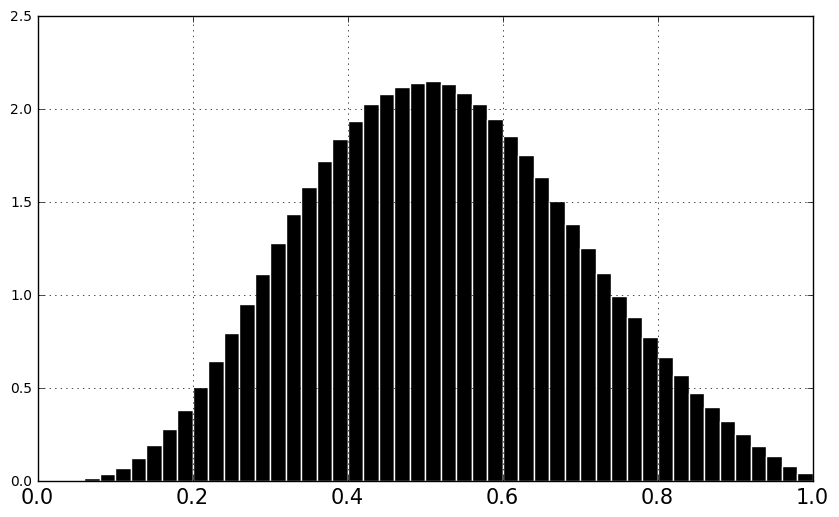

In [261]:
import matplotlib.pyplot as plt
%matplotlib inline
df_stacked.hist(bins=50,figsize=(10,6),xlabelsize=15, facecolor='k', edgecolor='w', range=[0,1], normed=True)

# Validity - Variation

In [20]:
1/50

0.02

In [21]:
CC_list = ['sic_3digit','gsubind','icode300','spe_kmeans']
df_full = pd.DataFrame()

for CC in CC_list:
    df = pd.DataFrame()
    for ind, group in data_dropped.groupby(by=['fyear',CC]):
        df_indi = {}
        asset_weight = group['at'] / group['at'].sum()
        w_OIasset = group['OI/asset']*asset_weight
        w_OIsales = group['OI/sales']*asset_weight
        w_marketB = group['b_mkt']*asset_weight
        df_indi['OI/sales std'] = group['OI/sales'].mean()
        df_indi['OI/asset std'] = group['OI/asset'].mean()
        df_indi['w_OI/sales std'] = w_OIasset.sum()
        df_indi['w_OI/asset std'] = w_OIsales.sum()
        df_indi['MKRET std'] = group['b_mkt'].mean()
        df_indi['w_MKRET std'] = w_marketB.sum()
        df = df.append(df_indi, ignore_index=True)
    df_full[CC]= df.std()
    
df_full.T

,MKRET std,OI/asset std,OI/sales std,w_MKRET std,w_OI/asset std,w_OI/sales std
sic_3digit,0.707098,0.096683,36.314012,0.741100,0.390000,0.065707
gsubind,0.583311,0.156493,75.336257,0.619035,3.455011,0.135974
icode300,0.768752,0.257213,28.905236,0.809329,4.492856,0.139255
spe_kmeans,0.888574,0.251674,53.825915,0.923976,10.818993,0.149519


### TNIC + dimension reduction validation

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

data_dropped.reset_index(inplace=True, drop=True)

for ind, data_by_year in data_dropped.groupby(by='fyear'):
    data_by_year.reset_index(inplace=True, drop=True)
    arrange = list(range(10))
    X_cart = data_by_year[arrange]
    df_pair = pd.DataFrame(cosine_similarity(X_cart))
    
    num_firm_in_clusters = int(data_by_year.shape[0] * 0.02)
    print(num_firm_in_clusters, end=' ')

    std_OIasset_each = []
    std_OIsales_each = []
    std_wOIasset_each = []
    std_wOIsales_each = []
    std_marketB_each = []
    std_wmarketB_each = []

    for i, data in df_pair.iterrows():
        if i%1000 == 0 :
            print(i, end=' ')
        sorted_data = data.sort_values(ascending=False).reset_index()
        sorted_data = sorted_data[:num_firm_in_clusters]['index']        
        selected_data = data_by_year.iloc[sorted_data,:]
        
        asset_weight = selected_data['at'] / selected_data['at'].sum()
        w_OIasset = selected_data['OI/asset']*asset_weight
        w_OIsales = selected_data['OI/sales']*asset_weight
        w_marketB = selected_data['b_mkt']*asset_weight
        
        std_OIasset_each.append(selected_data['OI/asset'].mean())
        std_OIsales_each.append(selected_data['OI/sales'].mean())
        std_marketB_each.append(selected_data['b_mkt'].mean())
        std_wOIasset_each.append(w_OIasset.sum())
        std_wOIsales_each.append(w_OIsales.sum())
        std_wmarketB_each.append(w_marketB.sum())

        del sorted_data, selected_data    

    df = pd.DataFrame()
    df['OI/sales std'] = std_OIsales_each
    df['OI/asset std'] = std_OIasset_each
    df['w_OI/sales std'] = std_wOIsales_each
    df['w_OI/asset std'] = std_wOIasset_each
    df['MKRET std'] = std_marketB_each
    df['w_MKRET std'] = std_wmarketB_each
    print()

df_full['Autoencoder + TNIC']= df.std()
df_full.T

33 0 1000 
43 0 1000 2000 
43 0 1000 2000 
44 0 1000 2000 


,MKRET std,OI/asset std,OI/sales std,w_MKRET std,w_OI/asset std,w_OI/sales std
sic_2digit,0.448005,0.103919,43.997728,0.534370,0.503103,0.050600
ff49,0.436450,0.114944,72.047043,0.520746,0.921309,0.062890
gind_x,0.479306,0.159398,20.410070,0.557798,0.626056,0.125597
icode50,0.403439,0.319530,50.430604,0.472919,0.734941,0.066580
spe_kmeans,0.405901,0.130208,22.747178,0.442175,3.273875,0.057237
Autoencoder + TNIC,0.317283,0.140114,26.812388,0.413457,0.066724,3.923509


### TNIC-Only validation

In [47]:
for ind, data_by_year in data_dropped.groupby(by='fyear'):
    data_by_year.reset_index(inplace=True, drop=True)
    arrange = ['f%s'%i for i in range(2000)]
    X_cart = data_by_year[arrange]
    df_pair_2000 = pd.DataFrame(cosine_similarity(X_cart))
    
    num_firm_in_clusters = int(data_by_year.shape[0] * 0.02)
    print(num_firm_in_clusters, end=' ')

    std_OIasset_each = []
    std_OIsales_each = []
    std_wOIasset_each = []
    std_wOIsales_each = []
    std_marketB_each = []
    std_wmarketB_each = []
    
    for i, data in df_pair_2000.iterrows():
        if i%1000 == 0 :
            print(i, end=' ')
        sorted_data = data.sort_values(ascending=False).reset_index()
        sorted_data = sorted_data[:num_firm_in_clusters]['index']        
        selected_data = data_by_year.iloc[sorted_data,:]      
        
        asset_weight = selected_data['at'] / selected_data['at'].sum()
        w_OIasset = selected_data['OI/asset']*asset_weight
        w_OIsales = selected_data['OI/sales']*asset_weight
        w_marketB = selected_data['b_mkt']*asset_weight
        std_OIasset_each.append(selected_data['OI/asset'].mean())
        std_OIsales_each.append(selected_data['OI/sales'].mean())
        std_marketB_each.append(selected_data['b_mkt'].mean())
        
        std_wOIasset_each.append(w_OIasset.sum())
        std_wOIsales_each.append(w_OIsales.sum())
        std_wmarketB_each.append(w_marketB.sum())

        del sorted_data, selected_data    

    df = pd.DataFrame()
    df['OI/sales std'] = std_OIsales_each
    df['OI/asset std'] = std_OIasset_each
    df['w_OI/sales std'] = std_wOIsales_each
    df['w_OI/asset std'] = std_wOIasset_each
    df['MKRET std'] = std_marketB_each
    df['w_MKRET std'] = std_wmarketB_each
    print()
    
df_full['TNIC']= df.std()
df_full.T

33 0 1000 
43 0 1000 2000 
43 0 1000 2000 
44 0 1000 2000 


,MKRET std,OI/asset std,OI/sales std,w_MKRET std,w_OI/asset std,w_OI/sales std
sic_2digit,0.448005,0.103919,43.997728,0.534370,0.503103,0.050600
ff49,0.436450,0.114944,72.047043,0.520746,0.921309,0.062890
gind_x,0.479306,0.159398,20.410070,0.557798,0.626056,0.125597
icode50,0.403439,0.319530,50.430604,0.472919,0.734941,0.066580
spe_kmeans,0.405901,0.130208,22.747178,0.442175,3.273875,0.057237
Autoencoder + TNIC,0.317283,0.140114,26.812388,0.413457,0.066724,3.923509
TNIC,0.304668,0.163689,24.321424,0.385008,0.061103,1.388428


# Validation - Within

In [54]:
CC_list = ['sic_2digit','ff49','gind_x','icode50','spe_kmeans']
df_full = pd.DataFrame()

for CC in CC_list:
    df = pd.DataFrame()
    for ind, group in data_dropped.groupby(by=['fyear',CC]):
        df_indi = {}
        df_indi['asset_total'] = group['at'].sum()
        df_indi['OI/sales std'] = group['OI/sales'].std()
        df_indi['OI/asset std'] = group['OI/asset'].std()
        df_indi['MKRET std'] = group['b_mkt'].std()
        df = df.append(df_indi, ignore_index=True)
    
    weight = df['asset_total']/df['asset_total'].sum()
    df_full.loc['wOI/sales std',CC]= (df['OI/sales std']*weight).sum()
    df_full.loc['wOI/asset std',CC]= (df['OI/asset std']*weight).sum()
    df_full.loc['wMKRET std',CC]= (df['MKRET std']*weight).sum()
    df_full.loc['OI/sales std',CC]= df['OI/sales std'].mean()
    df_full.loc['OI/asset std',CC]= df['OI/asset std'].mean()
    df_full.loc['MKRET std',CC]= df['MKRET std'].mean()
    
df_full.T

,wOI/sales std,wOI/asset std,wMKRET std,OI/sales std,OI/asset std,MKRET std
sic_2digit,23.215808,0.151201,1.002805,20.085229,0.147195,0.987945
ff49,22.034939,0.197023,1.046002,30.035096,0.180802,1.062016
gind_x,17.251666,0.229244,0.970580,18.606204,0.159295,1.032247
icode50,26.072298,0.175882,1.131368,23.804581,0.228713,1.059875
spe_kmeans,25.185416,0.249323,1.092266,28.818764,0.223817,1.149467


In [55]:
from sklearn.metrics.pairwise import cosine_similarity

data_dropped.reset_index(inplace=True, drop=True)

for ind, data_by_year in data_dropped.groupby(by='fyear'):
    data_by_year.reset_index(inplace=True, drop=True)
    arrange = list(range(10))
    X_cart = data_by_year[arrange]
    df_pair = pd.DataFrame(cosine_similarity(X_cart))
    
    num_firm_in_clusters = int(data_by_year.shape[0] * 0.02)
    print(num_firm_in_clusters, end=' ')

    std_OIasset_each = []
    std_OIsales_each = []
    std_marketB_each = []
    asset_total = []

    for i, data in df_pair.iterrows():
        if i%1000 == 0 :
            print(i, end=' ')
        sorted_data = data.sort_values(ascending=False).reset_index()
        sorted_data = sorted_data[:num_firm_in_clusters]['index']        
        selected_data = data_by_year.iloc[sorted_data,:]
        
        std_OIasset_each.append(selected_data['OI/asset'].std())
        std_OIsales_each.append(selected_data['OI/sales'].std())
        std_marketB_each.append(selected_data['b_mkt'].std())
        asset_total.append(selected_data['at'].sum())

        del sorted_data, selected_data    

    df = pd.DataFrame()
    df['OI/sales std'] = std_OIsales_each
    df['OI/asset std'] = std_OIasset_each
    df['MKRET std'] = std_marketB_each
    df['asset_total'] = asset_total

    weight = df['asset_total']/df['asset_total'].sum()
    df_full.loc['wOI/sales std','Autoencoder + TNIC']= (df['OI/sales std']*weight).sum()
    df_full.loc['wOI/asset std','Autoencoder + TNIC']= (df['OI/asset std']*weight).sum()
    df_full.loc['wMKRET std','Autoencoder + TNIC']= (df['MKRET std']*weight).sum()
    df_full.loc['OI/sales std','Autoencoder + TNIC']= df['OI/sales std'].mean()
    df_full.loc['OI/asset std','Autoencoder + TNIC']= df['OI/asset std'].mean()
    df_full.loc['MKRET std','Autoencoder + TNIC']= df['MKRET std'].mean()
    
df_full.T

33 0 1000 43 0 1000 2000 43 0 1000 2000 44 0 1000 2000 

,wOI/sales std,wOI/asset std,wMKRET std,OI/sales std,OI/asset std,MKRET std
sic_2digit,23.215808,0.151201,1.002805,20.085229,0.147195,0.987945
ff49,22.034939,0.197023,1.046002,30.035096,0.180802,1.062016
gind_x,17.251666,0.229244,0.970580,18.606204,0.159295,1.032247
icode50,26.072298,0.175882,1.131368,23.804581,0.228713,1.059875
spe_kmeans,25.185416,0.249323,1.092266,28.818764,0.223817,1.149467
Autoencoder + TNIC,26.417899,0.235336,1.281822,37.412193,0.237341,1.360247


In [56]:
for ind, data_by_year in data_dropped.groupby(by='fyear'):
    data_by_year.reset_index(inplace=True, drop=True)
    arrange = ['f%s'%i for i in range(2000)]
    X_cart = data_by_year[arrange]
    df_pair_2000 = pd.DataFrame(cosine_similarity(X_cart))
    
    num_firm_in_clusters = int(data_by_year.shape[0] * 0.02)
    print(num_firm_in_clusters, end=' ')

    std_OIasset_each = []
    std_OIsales_each = []
    std_marketB_each = []
    asset_total = []
    
    for i, data in df_pair_2000.iterrows():
        if i%1000 == 0 :
            print(i, end=' ')
        sorted_data = data.sort_values(ascending=False).reset_index()
        sorted_data = sorted_data[:num_firm_in_clusters]['index']        
        selected_data = data_by_year.iloc[sorted_data,:]      
        
        std_OIasset_each.append(selected_data['OI/asset'].std())
        std_OIsales_each.append(selected_data['OI/sales'].std())
        std_marketB_each.append(selected_data['b_mkt'].std())
        asset_total.append(selected_data['at'].sum())

        del sorted_data, selected_data

    df = pd.DataFrame()
    df['OI/sales std'] = std_OIsales_each
    df['OI/asset std'] = std_OIasset_each
    df['MKRET std'] = std_marketB_each
    df['asset_total'] = asset_total

    weight = df['asset_total']/df['asset_total'].sum()
    df_full.loc['wOI/sales std','TNIC']= (df['OI/sales std']*weight).sum()
    df_full.loc['wOI/asset std','TNIC']= (df['OI/asset std']*weight).sum()
    df_full.loc['wMKRET std','TNIC']= (df['MKRET std']*weight).sum()
    df_full.loc['OI/sales std','TNIC']= df['OI/sales std'].mean()
    df_full.loc['OI/asset std','TNIC']= df['OI/asset std'].mean()
    df_full.loc['MKRET std','TNIC']= df['MKRET std'].mean()
    
df_full.T

33 0 1000 43 0 1000 2000 43 0 1000 2000 44 0 1000 2000 

,wOI/sales std,wOI/asset std,wMKRET std,OI/sales std,OI/asset std,MKRET std
sic_2digit,23.215808,0.151201,1.002805,20.085229,0.147195,0.987945
ff49,22.034939,0.197023,1.046002,30.035096,0.180802,1.062016
gind_x,17.251666,0.229244,0.970580,18.606204,0.159295,1.032247
icode50,26.072298,0.175882,1.131368,23.804581,0.228713,1.059875
spe_kmeans,25.185416,0.249323,1.092266,28.818764,0.223817,1.149467
Autoencoder + TNIC,26.417899,0.235336,1.281822,37.412193,0.237341,1.360247
TNIC,20.067638,0.212825,1.283083,32.709452,0.237054,1.379166


# Visualization

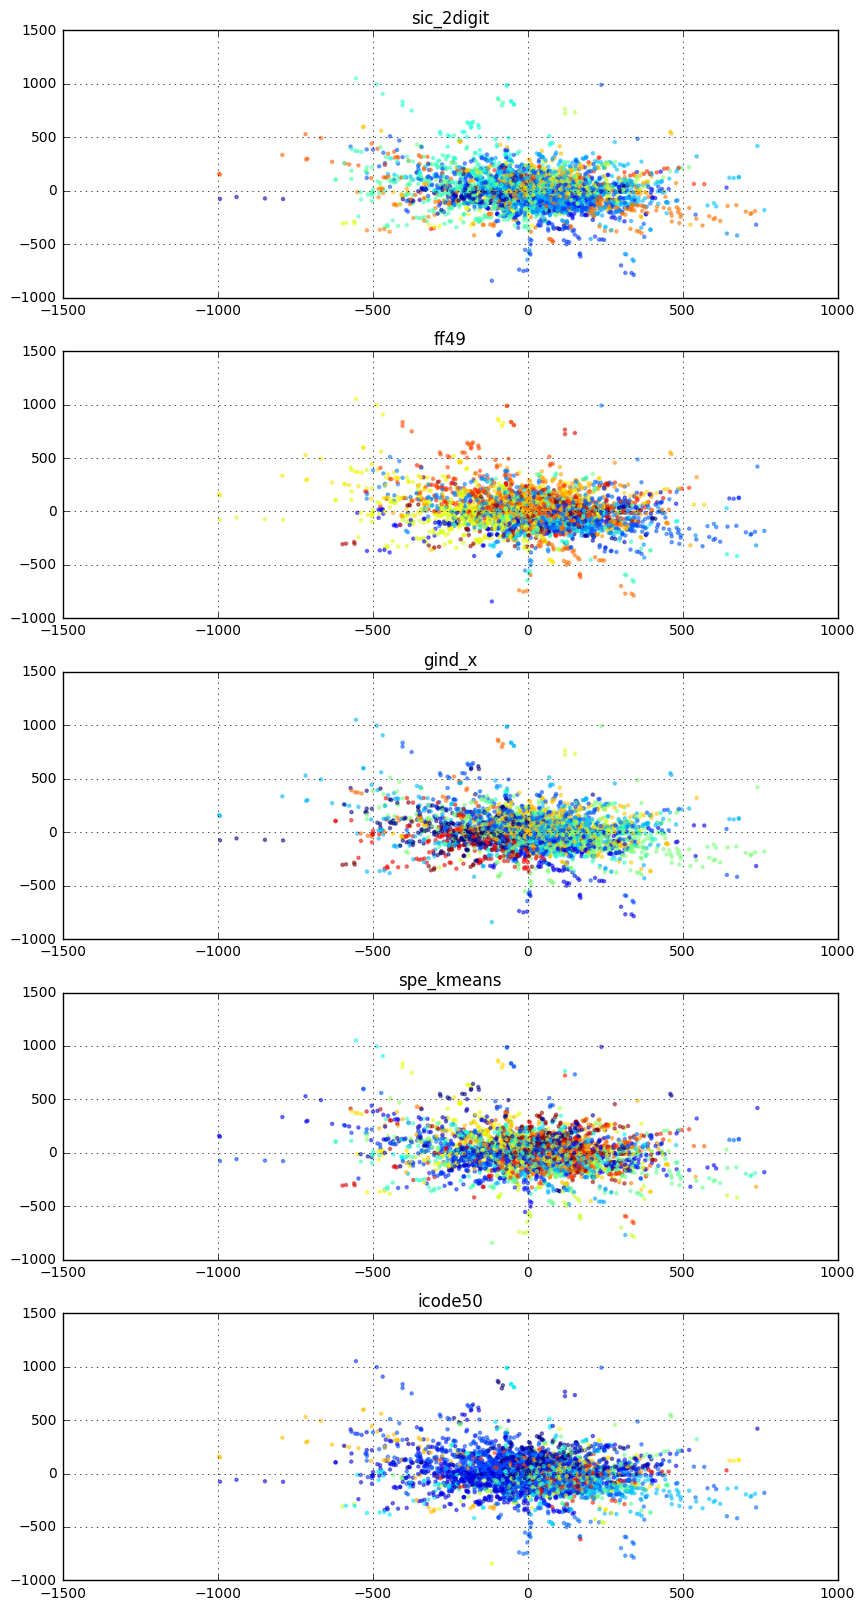

In [391]:
%matplotlib inline
import matplotlib.pyplot as plt

xs, ys = data_dropped[0], data_dropped[1]
# xs, ys, zs = data_result[0]*10, data_result[1]*10, data_result[2]*10
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(5, 1, 1)
ax2 = fig.add_subplot(5, 1, 2)
ax3 = fig.add_subplot(5, 1, 3)
ax4 = fig.add_subplot(5, 1, 4)
ax5 = fig.add_subplot(5, 1, 5)

ax1.scatter(xs,ys, c=data_dropped['sic_2digit'], marker='o',edgecolors='face',s=5, alpha=0.5)
ax2.scatter(xs,ys, c=data_dropped['ff49'], marker='o',edgecolors='face',s=5, alpha=0.5)
ax3.scatter(xs,ys, c=data_dropped['gind_x'], marker='o',edgecolors='face',s=5, alpha=0.5)
ax4.scatter(xs,ys, c=data_dropped['spe_kmeans'], marker='o',edgecolors='face',s=5, alpha=0.5)
ax5.scatter(xs,ys, c=data_dropped['icode50'], marker='o',edgecolors='face',s=5, alpha=0.5)

ax1.grid()
ax1.set_title('sic_2digit')
ax2.grid()
ax2.set_title('ff49')
ax3.grid()
ax3.set_title('gind_x')
ax4.grid()
ax4.set_title('spe_kmeans')
ax5.grid()
ax5.set_title('icode50')

# Visual Interpretation

In [274]:
import pandas as pd
import numpy as np
import pickle

# data_reduced = pd.read_excel('2d_FinalResult_0510.xlsx')
data_reduced = pd.read_excel('clustering_Result_0312_2d_cartesian.xlsx')
print(data_reduced.shape)
data_reduced.head()

(2890, 7)


,0,1,Company,SIC,clustered,ff10,ff12
0,221.767456,31.960848,SANDISK CORP,3572,11,6,6
1,-50.641903,-62.152634,HENRY SCHEIN INC,5047,10,9,9
2,44.496933,90.042709,CORE LABORATORIES N V,1389,9,4,4
3,33.626133,-61.235394,KENTUCKY BANCSHARES INC KY,6022,3,11,11
4,51.151691,-184.817703,IMPAC MORTGAGE HOLDINGS INC,6798,3,11,11


In [275]:
from spherecluster import SphericalKMeans

arange = list(range(0,2))
# arange = list(range(0,2))

num_clusters = 12
X_cart = data_reduced[arange]
kmeans_labels = SphericalKMeans(num_clusters, normalize=False,random_state=0).fit_predict(X_cart)
data_reduced['spe_kmeans'] = kmeans_labels
print(data_reduced.shape)
data_reduced.head()

(2890, 8)


,0,1,Company,SIC,clustered,ff10,ff12,spe_kmeans
0,221.767456,31.960848,SANDISK CORP,3572,11,6,6,4
1,-50.641903,-62.152634,HENRY SCHEIN INC,5047,10,9,9,10
2,44.496933,90.042709,CORE LABORATORIES N V,1389,9,4,4,2
3,33.626133,-61.235394,KENTUCKY BANCSHARES INC KY,6022,3,11,11,6
4,51.151691,-184.817703,IMPAC MORTGAGE HOLDINGS INC,6798,3,11,11,6


In [276]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.palettes import Set3_12
output_notebook()

Loading BokehJS ...

In [277]:
source = ColumnDataSource(data=dict(
    x=data_reduced[0],
    y=data_reduced[1],
    company=data_reduced['Company'],
    sic=data_reduced['SIC'],
    ff12=data_reduced['ff12'],
    spe=data_reduced['spe_kmeans'],
    color = [Set3_12[i] for i in data_reduced['ff12']-1]
))

hover = HoverTool(tooltips=[
    ("Company", '@company'),
    ("ff12", '@ff12'),
    ("sic", '@sic'),
    ("clustering", '@spe'),
])

p = figure(plot_width=800, plot_height=600, tools=[hover])

p.circle('x', 'y', size=5, color='color',source=source, alpha=0.9)

show(p)


In [74]:
data_reduced[data_reduced['spe_kmeans'].isin([10,11])].to_csv('1112.csv')